In [50]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 8.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 16.4 MB/s eta 0:00:00
  Using cached pillow-11.2.1-cp310-cp310-manylinux_2_28_x86_64.whl (4.6 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 25.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 14.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 KB 24.5 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import zipfile

In [9]:
DIR = os.getcwd()
for filename in os.listdir(DIR):
    if filename.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(DIR, filename), 'r') as zipObject:
            zipObject.extractall(DIR)
        F = "DATASETS"
        if not os.path.exists(F):
            os.makedirs(F)
else:
    print("No zip files found in the directory.")

No zip files found in the directory.


In [ ]:
SensorData: pd.DataFrame = pd.read_csv("/home/kiranftw/OFFICE/AI-Powered-Solar-Maintenance-System/DATASETS/Plant_1_Weather_Sensor_Data.csv")

InverterData: pd.DataFrame = pd.read_csv("/home/kiranftw/OFFICE/AI-Powered-Solar-Maintenance-System/DATASETS/Plant_1_Generation_Data.csv")

SensorData['DATE_TIME'] = pd.to_datetime(SensorData['DATE_TIME'])
InverterData['DATE_TIME'] = pd.to_datetime(InverterData['DATE_TIME'], format='%d-%m-%Y %H:%M')


In [35]:
dataframe = pd.read_csv("/home/kiranftw/OFFICE/AI-Powered-Solar-Maintenance-System/Combined_Generation_Weather_Data.csv")
print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:15   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
2  15-05-2020 00:30   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
3  15-05-2020 00:45   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
4  15-05-2020 01:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0          0.0    6259559.0            25.184316           22.857507   
1          0.0    6259559.0            25.084589           22.761668   
2          0.0    6259559.0            24.935753           22.592306   
3          0.0    6259559.0            24.846130           22.360852   
4          0.0    6259559.0            24.621525           22.165423   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [43]:
dataframe.isnull().sum()
dataframe = dataframe.dropna()
print(dataframe.info())
print(dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 0 to 3262
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3262 non-null   object 
 1   PLANT_ID             3262 non-null   int64  
 2   SOURCE_KEY           3262 non-null   object 
 3   DC_POWER             3262 non-null   float64
 4   AC_POWER             3262 non-null   float64
 5   DAILY_YIELD          3262 non-null   float64
 6   TOTAL_YIELD          3262 non-null   float64
 7   AMBIENT_TEMPERATURE  3262 non-null   float64
 8   MODULE_TEMPERATURE   3262 non-null   float64
 9   IRRADIATION          3262 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 280.3+ KB
None
           PLANT_ID      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count  3.262000e+03   3262.000000  3262.000000  3262.000000  3.262000e+03   
mean   4.135033e+06   2781.885398   275.011260  3221.851741  7.367504e+06  

In [45]:
dataframe['DATE_TIME'] = pd.to_datetime(dataframe['DATE_TIME'], format='%d-%m-%Y %H:%M')
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 0 to 3262
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3262 non-null   datetime64[ns]
 1   PLANT_ID             3262 non-null   int64         
 2   SOURCE_KEY           3262 non-null   object        
 3   DC_POWER             3262 non-null   float64       
 4   AC_POWER             3262 non-null   float64       
 5   DAILY_YIELD          3262 non-null   float64       
 6   TOTAL_YIELD          3262 non-null   float64       
 7   AMBIENT_TEMPERATURE  3262 non-null   float64       
 8   MODULE_TEMPERATURE   3262 non-null   float64       
 9   IRRADIATION          3262 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 280.3+ KB


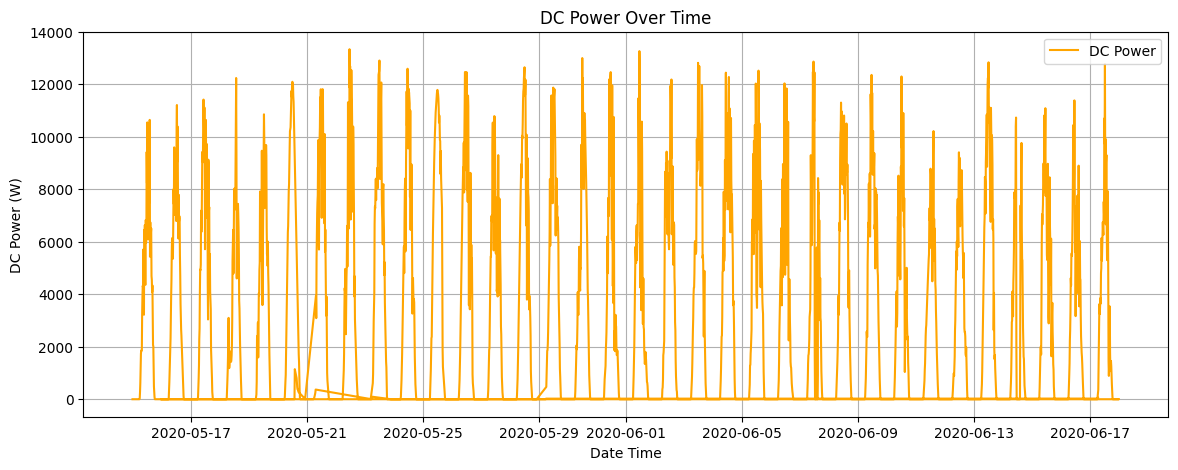

In [52]:
plt.figure(figsize=(14, 5))
plt.plot(dataframe['DATE_TIME'], dataframe['DC_POWER'], label='DC Power', color='orange')
plt.title('DC Power Over Time')
plt.xlabel('Date Time')
plt.ylabel('DC Power (W)')
plt.grid(True)
plt.legend()
plt.show()


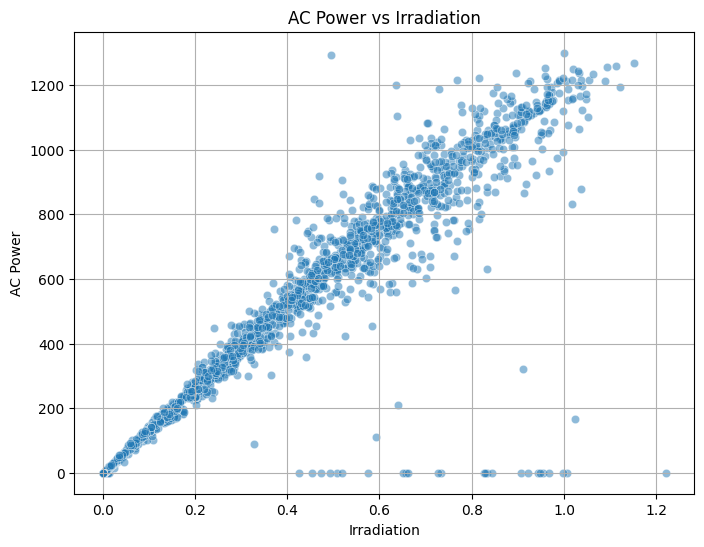

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IRRADIATION', y='AC_POWER', data=dataframe, alpha=0.5)
plt.title('AC Power vs Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('AC Power')
plt.grid(True)
plt.show()


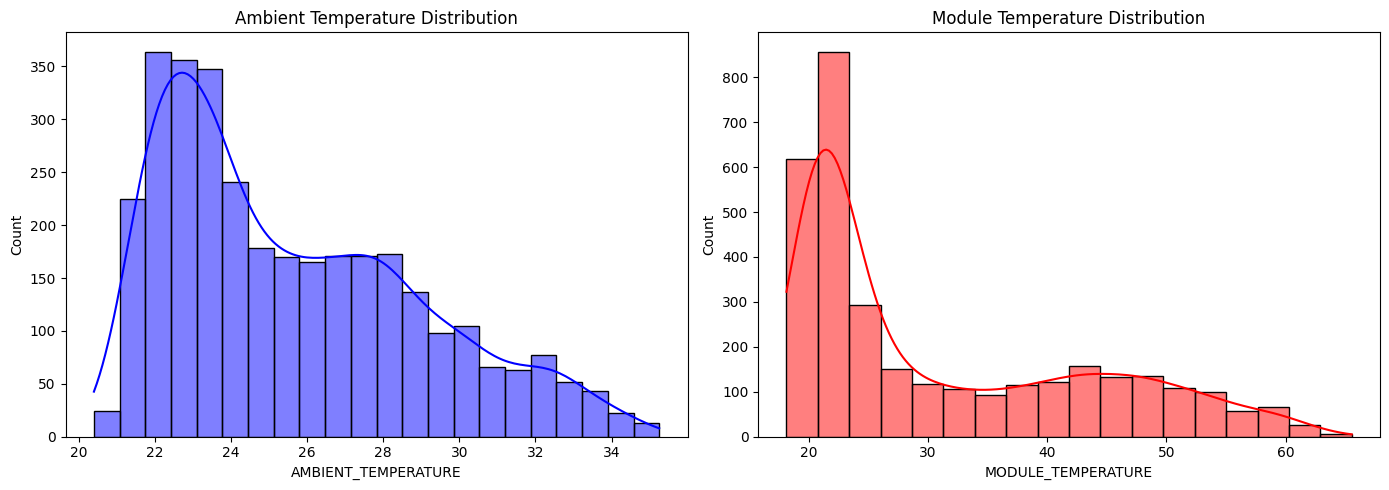

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(dataframe['AMBIENT_TEMPERATURE'], kde=True, ax=ax[0], color='blue')
ax[0].set_title('Ambient Temperature Distribution')
sns.histplot(dataframe['MODULE_TEMPERATURE'], kde=True, ax=ax[1], color='red')
ax[1].set_title('Module Temperature Distribution')
plt.tight_layout()
plt.show()


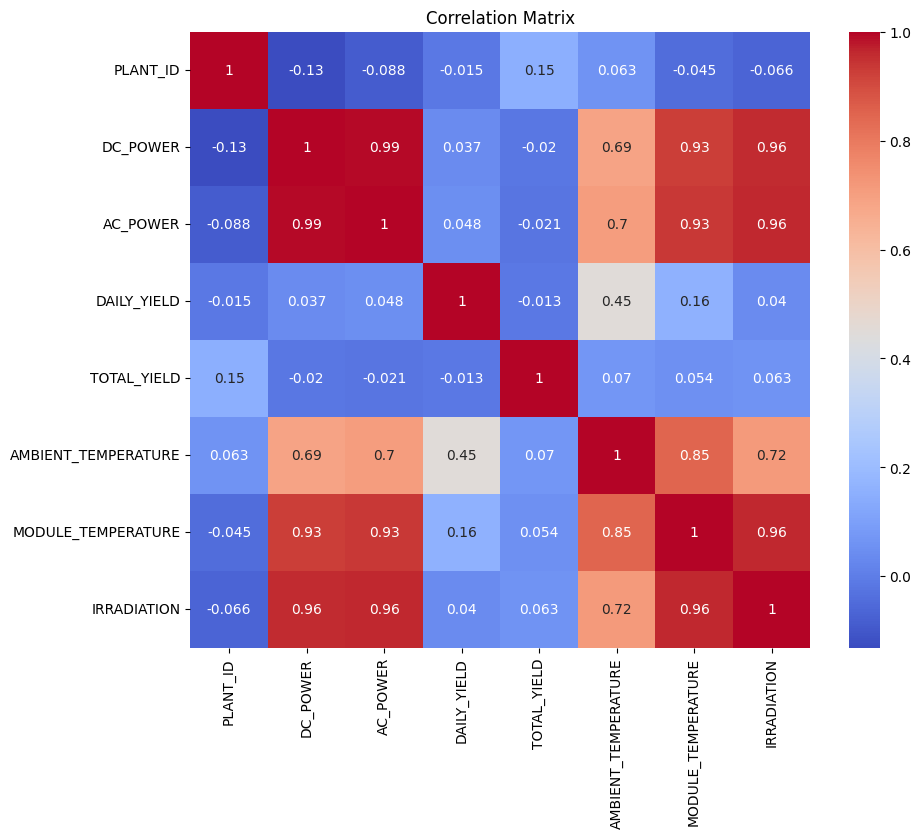

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.drop(['DATE_TIME', 'SOURCE_KEY'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [60]:
dataframe.to_csv('Processed_data.csv', index=False)